In [14]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
# rad_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_radiation.nc'
# radnc = xr.open_dataset(rad_path)
# # radnc = radnc.rename({'e0_avg':'pet'})
# radnc = radnc.where(radnc>=0, np.nan)
# radnc = radnc.squeeze()
# radnc
# spi = xr.open_dataset('/g/data/oe9/project/team-drip/Rainfall/SPI_awap/SPI_12M_masked.nc')
# spi

# rainfall = xr.open_dataarray('/g/data/oe9/project/team-drip/AWAP/AWAP_month_rain.nc')
EVI_5km  = xr.open_dataset('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_EVI.nc')
# EVI_5km
NDVI_5km = xr.open_dataset('/g/data/oe9/project/team-drip/resampled_NDVI/coarse_NDVI.nc')
# NDVI_5km
AET_5km  = xr.open_dataset('/g/data/oe9/project/team-drip/ENV_5km_month/AET_5km_month.nc')
AET_5km

<xarray.Dataset>
Dimensions:      (latitude: 261, longitude: 278, nv: 2, time: 217)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 ...
  * latitude     (latitude) float64 -24.65 -24.7 -24.75 -24.8 -24.85 -24.9 ...
  * longitude    (longitude) float64 138.6 138.7 138.7 138.8 138.8 138.8 ...
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv, latitude, longitude) float64 ...
    aet          (time, latitude, longitude) float64 ...
Attributes:
    var_name:  etot_avg

In [16]:
# average monthly to annual
EVI_5km_yearly  = EVI_5km.evi.resample(time="1A").mean(dim='time')
# EVI_5km_yearly
NDVI_5km_yearly = NDVI_5km.ndvi.resample(time="1A").mean(dim='time')
# NDVI_5km_yearly
AET_5km_yearly  = AET_5km.aet.resample(time="1A").mean(dim='time')
AET_5km_yearly

<xarray.DataArray 'aet' (time: 19, latitude: 261, longitude: 278)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...
  * latitude   (latitude) float64 -24.65 -24.7 -24.75 -24.8 -24.85 -24.9 ...
  * longitude  (longitude) float64 138.6 138.7 138.7 138.8 138.8 138

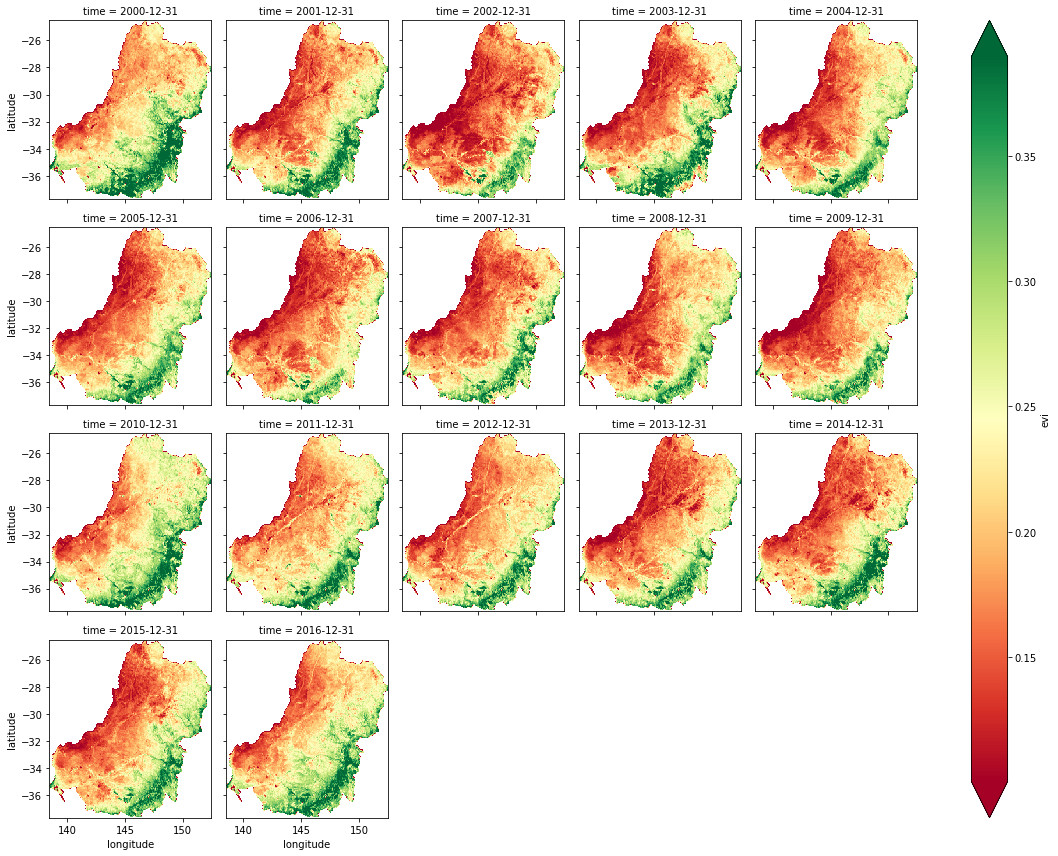

In [6]:
# EVI
%matplotlib inline
EVI_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'RdYlGn')

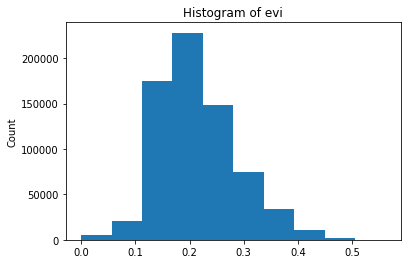

In [38]:
%matplotlib inline
EVI_5km_yearly.isel(time = range(0,17)).plot()
fname = '/home/599/rg6346/EVI_test.png'
plt.savefig(fname, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

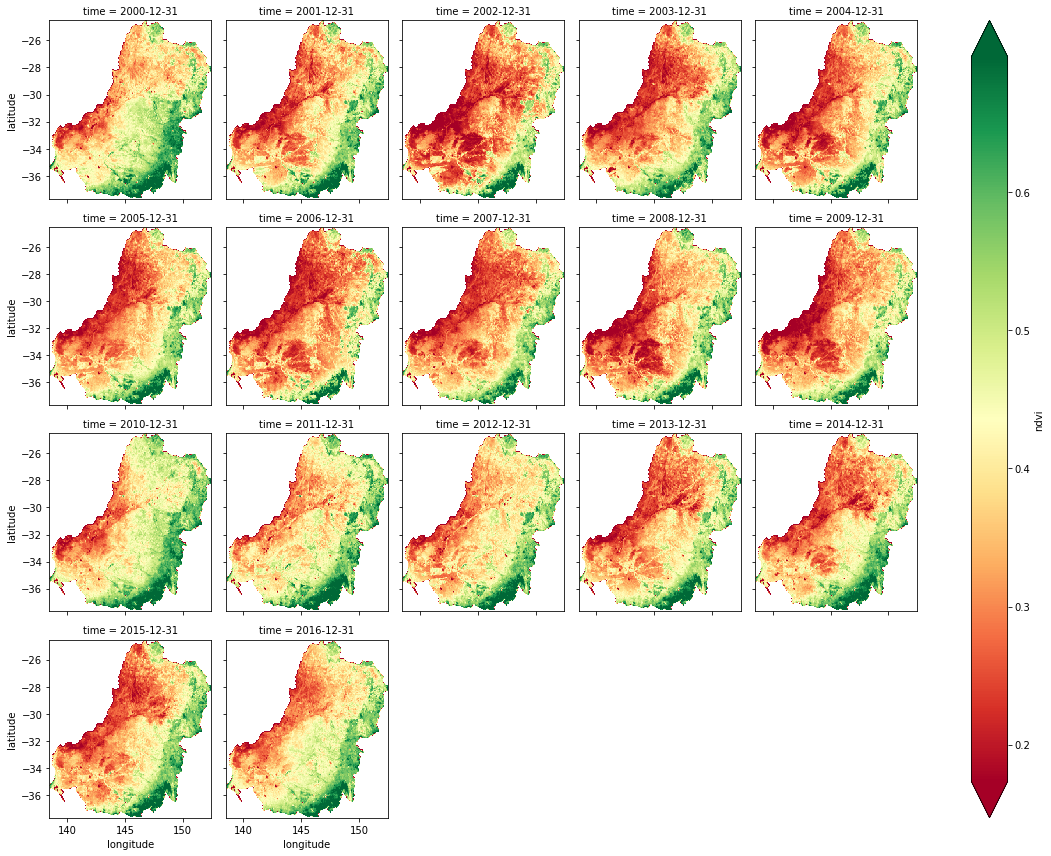

In [9]:
# NDVI
%matplotlib inline
NDVI_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'RdYlGn')

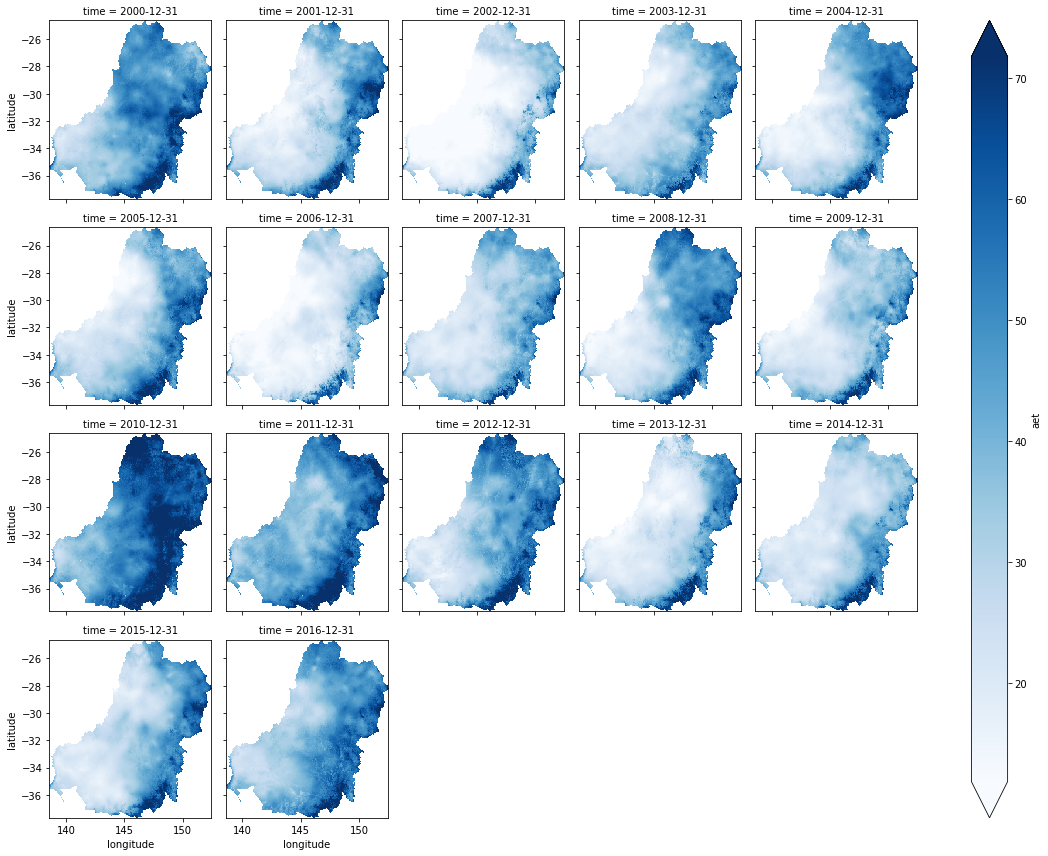

In [37]:
# AET
%matplotlib inline
AET_5km_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=5, cmap = 'Blues')

In [20]:
evi_ts  = EVI_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
ndvi_ts = NDVI_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
aet_ts = AET_5km_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
aet_ts

<xarray.DataArray 'aet' (time: 19)>
array([ 46.855519,  34.136871,  23.015766,  33.626669,  36.471607,  36.296999,
        24.362937,  33.247389,  38.798619,  31.731125,  58.110947,  48.525048,
        42.316974,  30.280214,  31.442933,  35.326711,  43.975495,  33.597177,
        28.757365])
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...

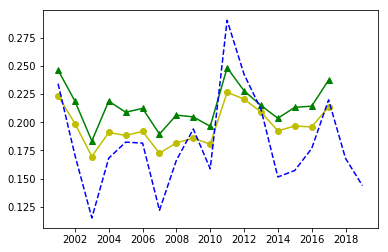

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(evi_ts.time,evi_ts,'g^-',ndvi_ts.time,ndvi_ts/2,'yo-',aet_ts.time,aet_ts/200,'b--')
plt.show()